# Modeling Classification

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
import io # Make sure to import io

# This returns a dictionary of uploaded files
uploaded = files.upload()

# Get the filename (assuming you uploaded only one file)
filename = list(uploaded.keys())[0]

# Read the file's content (bytes) into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Now this will work!
print(df.head())

Saving merged_health_census_clean.csv to merged_health_census_clean (2).csv
  StateAbbr    PlaceName  PlaceFIPS    TractFIPS        Place_TractID  \
0        CA  Los Angeles     644000   6037206032  0644000-06037206032   
1        CA     Pasadena     656000   6037462001  0656000-06037462001   
2        CA    Fullerton     628000   6059011504  0628000-06059011504   
3        TX     Longview    4843888  48183000401  4843888-48183000401   
4        WI      Madison    5548000  55025002200  5548000-55025002200   

   Tract_FIPS_full  Health_Pop  Obesity_Pct  Obesity_Count  Diabetes_Pct  ...  \
0       6037206032        5275         29.5         1556.0          15.5  ...   
1       6037462001        3974         32.0         1272.0          11.6  ...   
2       6059011504        5473         18.7         1023.0           4.6  ...   
3      48183000401        3371         33.9         1143.0           9.2  ...   
4      55025002200        4254         29.5         1255.0           8.7  ...   

In [10]:
df.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Tract_FIPS_full,Health_Pop,Obesity_Pct,Obesity_Count,Diabetes_Pct,...,Bachelors_Count,Unemployed_Pct,Unemployed_Count,Race_Total,Pct_White_Alone,Pct_Black_Alone,Pct_Asian_Alone,Majority_Race_Clean,Pct_Hispanic,Pct_Other
0,CA,Los Angeles,644000,6037206032,0644000-06037206032,6037206032,5275,29.5,1556.0,15.5,...,309,4.823990,185,5133,58.620690,0.935126,16.637444,Hispanic,77.089421,23.806741
1,CA,Pasadena,656000,6037462001,0656000-06037462001,6037462001,3974,32.0,1272.0,11.6,...,367,5.752670,167,3893,48.548677,10.608785,9.915232,Hispanic,70.459800,30.927305
2,CA,Fullerton,628000,6059011504,0628000-06059011504,6059011504,5473,18.7,1023.0,4.6,...,873,6.832522,379,6024,61.636786,1.626826,23.090969,White,30.378486,13.645418
3,TX,Longview,4843888,48183000401,4843888-48183000401,48183000401,3371,33.9,1143.0,9.2,...,201,4.592980,123,3170,82.965300,9.589905,3.470032,White,7.350158,3.974763
4,WI,Madison,5548000,55025002200,5548000-55025002200,55025002200,4254,29.5,1255.0,8.7,...,594,9.886264,339,4030,73.374690,11.116625,5.831266,White,8.263027,9.677419


In [11]:
df.columns

Index(['StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS', 'Place_TractID',
       'Tract_FIPS_full', 'Health_Pop', 'Obesity_Pct', 'Obesity_Count',
       'Diabetes_Pct', 'Diabetes_Count', 'HighChol_Pct', 'HighChol_Count',
       'HighBP_Pct', 'HighBP_Count', 'Stroke_Pct', 'Stroke_Count', 'Sleep_Pct',
       'Sleep_Count', 'MentalHealth_Pct', 'MentalHealth_Count', 'Asthma_Pct',
       'Asthma_Count', 'HeartDisease_Pct', 'HeartDisease_Count', 'Smoking_Pct',
       'Smoking_Count', 'State_FIPS', 'County_FIPS', 'Tract_FIPS',
       'State_Name', 'County_Name', 'Tract_Name', 'Median_Income',
       'Median_Age', 'Poverty_Pct', 'Poverty_Count', 'HS_Grad_Pct',
       'HS_Grad_Count', 'Bachelors_Pct', 'Bachelors_Count', 'Unemployed_Pct',
       'Unemployed_Count', 'Race_Total', 'Pct_White_Alone', 'Pct_Black_Alone',
       'Pct_Asian_Alone', 'Majority_Race_Clean', 'Pct_Hispanic', 'Pct_Other'],
      dtype='object')

### Modeling Setup

In [12]:
#create obesity categories
df["Obesity_Category"] = pd.qcut(df["Obesity_Pct"], q=3, labels=["Low", "Medium", "High"])

In [13]:
#define features and target
X = df[["Median_Income", "Median_Age", "Poverty_Pct",
        "HS_Grad_Pct", "Bachelors_Pct", "Unemployed_Pct",
        "Pct_White_Alone", "Pct_Black_Alone", "Pct_Asian_Alone",
        "Pct_Hispanic", "Pct_Other"]]
y = df["Obesity_Category"]

In [14]:
#test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80, stratify=y)

In [15]:
#scale features to the same units (z-score)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### kNN

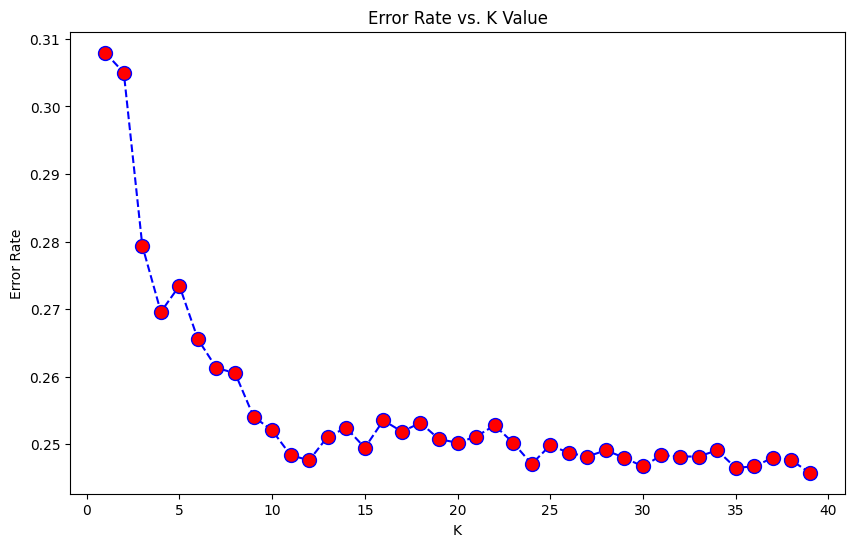

In [19]:
#trying out different k values, looking for the lowest error rate and that would be our best k value for this model.

import matplotlib.pyplot as plt

error_rate = []

# this takes a sec to run
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    # error rate = mean of predictions that were not equal to the actual values
    error_rate.append(np.mean(pred_i != y_test))

# Plot of error rate v k value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#mb this can be included in final pres to show how we decided k value

Based on this plot, k = 11 looks best for our data. This is the minimum it hits before it starts fluctuating too much to be a significant minimum. If we chose below this, it would be underfitting i believe since k would be too big.

In [20]:
#create model w k=11
knn_optimal = KNeighborsClassifier(n_neighbors=11)

#train on full scale
knn_optimal.fit(X_train_scaled, y_train)

#predications made
y_pred = knn.predict(X_test_scaled)

#evaluation metrics (this is what chat suggested to do, but lmk if theres smth else u guys think of)
print("Final Confusion Matrix (k=11):")
print(confusion_matrix(y_test, y_pred))

print("\nFinal Classification Report (k=11):")
print(classification_report(y_test, y_pred))

# i included some interpretation i could do under this

Final Confusion Matrix (k=11):
[[1484   13  302]
 [  11 1453  364]
 [ 272  371 1153]]

Final Classification Report (k=11):
              precision    recall  f1-score   support

        High       0.84      0.82      0.83      1799
         Low       0.79      0.79      0.79      1828
      Medium       0.63      0.64      0.64      1796

    accuracy                           0.75      5423
   macro avg       0.75      0.75      0.75      5423
weighted avg       0.76      0.75      0.75      5423



**CONFUSION MATRIX: **
Correct predictions (diagonal)
- 1484 instaces that were actually Low were predicted as Low
- 1453 instances that were Medium were correctly predicted as Medium
- 1153 correctly predicted as High

Pretty equally as good at identifying Low and Medium categories

Incorrect predictions
- 13 instances that were actually Low were predicted as Medium
- 11 that were actually medium were predicted as low
- 371 that were high were predicted as medium
- 272 were predicted low but actually high
- 302 predicted hgih but actually low
- 362 predicted high but actually medium

Our largest error 371 where our model confuses medium for high. Pretty high confusion seen for high and low as well.



**CLASSIFICATION REPORT**

Precision score: Of all the areas in that category, what percent of them did the model successfully find

High recall percent means low rate of false negatives

F1 Score: weighted average of precision and recall
- higher f1 score means model is stronger in predicting that category than lesser/weaker ones

(Kinda confused bc confusion matrix showed most confusion with predicting High v Low but then the F1 score for High is largest here)

Support: just the occurrences of each class in test data

accuracy: overall percent correct for all predictions.

macro avg: unweighted average of precision, recall, F1 score across all three classes

weighted avg: avg based on support (count of occurrences in each class)


### Logistic Regression

In [ ]:
#train logistic regression model and evaluate it